# Understanding Iterators and Generators

## Iterators
An iterator is basically any python type that lets you loop over a object, say using a `for` loop

What they allows you to do is :
- Have a cleaner code
- Save resources

Here is an example of a `for` loop

In [ ]:
# range(5) itself is an iterator object, list is used to be able to print it
numbers = list(range(5))
print(numbers)

In [ ]:
for i in numbers:
    print(i)

In this example, the __range(5)__ is the iterable object that provides, at each iteration, a different value that is assigned to the "i" variable.

In Python, an iterator is an object which implements the iterator protocol. 
- \__iter\__ : This returns the iterator object itself
- next() : This returns the next value. And the _StopIteration_ error once all the objects have been looped through.

When you use a loop to iterate over the iterator, you don’t need to call next and you also don’t have to worry about the StopIteration exception being raised.

Using these functions, we can create our own iterator

In [ ]:
it = iter(numbers)
print(it)

In [ ]:
print(next(it))
print(next(it))

In [ ]:
print(list(it))

In [ ]:
next(it) #StopIteration Error

Iterator objects can also be strings

In [ ]:
string = 'python'
it = iter(string)
print(next(it))
print(next(it))
print(list(it))

In [ ]:
for i in string:
    print(i, end=" ")

You can loop through multiple lists using zip

In [ ]:
for i, x in zip(range(3), 'abc'):  # I think zip is a type of generator function ?
    print(i, x)

You can use `break` to exit `for` loop

In [ ]:
for i in range(4000):
    print(i)
    if i >= 2:
        break

### Building an iterator from scratch

In [ ]:
class simple_iterator:
    def __init__(self, maxnumber):
        self.maxnumber = maxnumber
        self.current = 0

    def __iter__(self):
        return self

    def __next__(self):
        next_value = self.current
        if next_value >= self.maxnumber:
            raise StopIteration
        self.current += 1
        return next_value

In [ ]:
for i in simple_iterator(3):
    print(i)

## Excercise 1: Find frame rate of your webcam using iterators

In [ ]:
import cv2  # Opencv library to read images from webcam
import datetime

class open_webcam_images:
    def __init__(self, maxframes):
        # Captures videos from the webcam
        self.video_capture = cv2.VideoCapture(0)
        self.elapsedtime = 0
        self.maxframes = 10
        self.currentframe = 0
        self.starttime = datetime.datetime.now()

    def __iter__(self):
        return self

    def __next__(self):
        if self.currentframe >= self.maxframes:
            raise StopIteration

        _, frame = self.video_capture.read()
        self.elapsedtime = (datetime.datetime.now() -
                            self.starttime).total_seconds()
        self.currentframe += 1

        return self.elapsedtime, self.currentframe

    def __exit__(self):
        self.video_capture.release()

In [ ]:
framestocapture = 10
for i in open_webcam_images(framestocapture):
    elapsedtime = i[0]
    print('Frame number {} : Elapsedtime {}'.format(i[1], i[0]))
    
# Find frame rate using elapsed time
framerate = framestocapture/i[0]
f'Frame rate of your webcam is {framerate:0.3f} frames/second'

## Generators
Generators are just a simple form of iterators. A function that **_yields_** values.  They are a nice and compact way of building an iterator without actually building an iterator. 

The __yield__ keyword used to define generators takes care of \__iter__\() and next() for you.

__Generators are a readable shortcut for creating iterators.__

In [ ]:
def simple_generator_function():
    yield 0
    yield 1
    yield 2

In [ ]:
our_generator = simple_generator_function()
print(our_generator)

In [ ]:
print(next(our_generator))
print(next(our_generator))
print(next(our_generator))

In [ ]:
for i in simple_generator_function():
    print(i)

### Python Generators with a loop

In [ ]:
def simple_generator_function(number):
    for ii in range(number):
        yield ii

In [ ]:
for i in simple_generator_function(3):
    print(i)

### That frame rate example with generators

In [ ]:
import cv2
import datetime
import numpy as np


def open_webcam_images(video_capture, maxframes):
    for ii in range(maxframes):
        _, frame = video_capture.read()
        yield frame


def find_framerate(maxframes):
    video_capture = cv2.VideoCapture(0)
    framenumber = 0
    starttime = datetime.datetime.now()

    for frame in open_webcam_images(video_capture, maxframes):
        elapsedtime = (datetime.datetime.now() - starttime).total_seconds()
        framenumber+=1
        print('Frame number {} : Elapsedtime {}'.format(framenumber, elapsedtime))

    video_capture.release()
    return elapsedtime


framestocapture = 10
elapsedtime = find_framerate(framestocapture)

# Find frame rate using elapsed time
framerate = framestocapture / elapsedtime
f'Frame rate of your webcam is {framerate:0.3f} frames/second'

## Excercise 2: Create sliding windows
Say you want to detect objects in an image using something fancy like machine learning, an easy thing to do is to take a window and slide it over your image and analyse contents of that window - inspired by pyimagesearch.com

In [15]:
def sliding_window(image, stepsize, windowsize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepsize):
        for x in range(0, image.shape[1], stepsize):
            # yield the current window
            yield (x, y, image[y:y + windowsize[1], x:x + windowsize[0]])

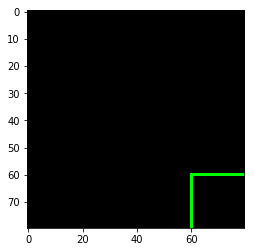

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from IPython import display
%matplotlib inline

img = np.zeros([80,80,3],dtype=np.uint8) #Ceate an empty array
(winW, winH) = (20, 20) #Define height of sliding window

for (x, y, window) in sliding_window(img, stepsize=20, windowsize=(winW, winH)):
    rectimg = img.copy()
    cv2.rectangle(rectimg, (x, y), (x + winW, y + winH), (0, 255, 0), 1)
     #You can write some Machine learning or object detection codes here
    plt.imshow(rectimg)
    plt.draw()
    display.clear_output(wait=True) #This clears the display and wait for next output
    display.display(plt.gcf())
    plt.close()